## Ingeniería de las categorías raras o poco frecuentes

Las categorías poco frecuentes o raras son aquellas etiquetas (dentro de una variable categórica) que estan presentes en un porcentaje pequeño de las observaciones. No hay una regla general para determinar que 'tan pequeño' es un porcentaje pequeño, pero típicamente, cualquier valor menor de 5% puede ser considerado poco frecuente.

Como discutimos anteriormente en la sección 3 de este curso, las categorías poco frecuentes son tan escasas, que es difícil extraer o sacar información confiable de ellas. Lo más importante que debes recordar de la sección 3, es que las etiquetas poco frecuentes tienden a aparecer solamente en uno de los sets, ya sea el de entrenamiento o el de prueba:

- Si solo en el set de entrenamiento, pueden causar sobre-ajustes
- Si solo en el set de prueba, nuestro modelo de machine learning no sabrá como manejar y evaluar dichas categorías.

Por lo tanto, para evitar este tipo de comportamiento, se usa agrupar dichas categorías poco frecuentes en una nueva etiqueta llamada 'Rara' o 'Otra'.

Las etiquetas poco frecuentes pueden aparecer en variables de alta o baja cardinalidad. No hay tampoco una regla general para determinar a partir de cuantas etiquetas se considera alta cardinalidad. Depende de cuantas observaciones hay en los datos. Por ejemplo, en conjuntos de datos con 1,000 observaciones, 100 etiquetas pueden parecer bastantes, mientras que en unos datos con 100,000 observaciones no parecen tantas.

Variables de alta cardinalidad tienden a tener muchas etiquetas poco frecuentes o categorías raras, mientras que las de baja cardinalidad, puede que solo tengan 1 o 2 etiquetas raras.

### Importante:

**Agrupar las etiquetas poco frecuentes bajo una nueva categoria llamada 'Rara' or 'Otra' es una práctica común en machine learning en la industria y para negocios**

- Agrupar las categorías en una nueva categoria, cuando se tiene una variable con baja cardinalidad, no necesariamente mejora el desempeño del modelo, sin embargo facilita el despliegue del modelo en producción.

- Agrupar las categorías en una nueva categoria, cuando se tiene una variable con alta cardinalidad mejora el desempeño de los modelos.


## En este demo:

Vamos a aprender como reagrupar las categorías poco frecuentes con una nueva etiqueta 'Rare' y vamos a comparar las implicaciones de este tipo de codificación en variables con:

- Una categoría predominante
- Un grupo pequeño de categorias
- Alta cardinalidad

Para este demo, vamos a usar los datos House Price. Agruparemos las variables usando:
- pandas 
- Feature-engine.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# separar los datos
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None) # mostrar todas las columnas presentes

## Conjunto de datos House Price 

In [2]:
# carguemos los datos

data = pd.read_csv('../houseprice.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Importante

La identificación de las etiquetas raras se debe llevar a cabo usando solamente el set de entrenamiento y luego propagarlo al set de prueba. En la práctica, lo que usualmente sucede es que identificamos las **etiquetas comunes** y luego cualquier otra etiqueta, ya sea en el set de prueba o entrenamiento o en los datos una vez el modelo se encuentre en producción que no este en la lista de **etiquetas comunes** serán re-agrupadas en una nueva categoría.

Por ejemplo, imaginemos que tenemos en el set de entrenamiento la variable 'ciudad' con las etiquetas 'London', 'Manchester' y 'York'. 'York' esta presente en menos de 5% de las observaciones por lo tanto decidimos re-agruparla en una nueva categoría llamada 'Rare'.

En el set de prueba, también deberíamos reemplazar 'York' por 'Rare' independientemente del porcentaje de las observaciones para 'York'en el set de prueba. Además, si en el set de prueba encontramos la categoría 'Milton Keynes', que no estaba presente en el set de entrenamiento, también deberíamos reemplazarla con la etiqueta 'Rare'.  En otras palabras, todas las categorías presentes en el set de prueba, que no esten presentes en la lista de **etiquetas comunes** categorías derivadas del set de entrenamiento, deben ser tratadas como raras y re-agroupadas en la nueva etiqueta 'Rare'.

In [3]:
# separemos los datos en sets de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1), # predictores
    data.SalePrice, # target
    test_size=0.3,  # porcentaje de observaciones en el set de prueba
    random_state=0)  # semilla asegurar reproducibilidad

X_train.shape, X_test.shape

((1022, 80), (438, 80))

## Variables con una categoría dominante 

In [4]:
# exploremos unos pocos ejemplos de variables con pocas categorías,
# digamos 3 

for col in X_train.columns:
    
    if X_train[col].dtypes == 'O':  # si la variable es categórica
        
        if X_train[col].nunique() < 3:  # si la variable tiene menos de 3 categorías
            
            # imprimir porcentaje de observaciones por categoría
            print(X_train.groupby(col)[col].count() / len(X_train))
            print()

Street
Grvl    0.004892
Pave    0.995108
Name: Street, dtype: float64

Alley
Grvl    0.029354
Pave    0.031311
Name: Alley, dtype: float64

Utilities
AllPub    0.999022
NoSeWa    0.000978
Name: Utilities, dtype: float64

CentralAir
N    0.068493
Y    0.931507
Name: CentralAir, dtype: float64

PoolQC
Ex    0.000978
Gd    0.001957
Name: PoolQC, dtype: float64



### Conclusión

Las 3 variables anteriores, Street, Utilities y CentralAir, tienen una categoría dominante que incluye mas de 93-99% de las observaciones. Re-agroupar la etiqueta rara en esta situación no tiene ningún sentido.  Podriamos determinar si estas variables son importantes con un análisis exploratorio o con los algoritmos de selección de variables o remover las variables.

## Variables con unas pocas categorías

In [5]:
# las columnas en la siguiente lista tienen solo 4 differentes etiquetas

cols = ['MasVnrType', 'ExterQual', 'BsmtCond']

for col in cols:
    
    print(X_train.groupby(col)[col].count() / len(X_train)) # frecuencia
    print()

MasVnrType
BrkCmn     0.009785
BrkFace    0.294521
None       0.595890
Stone      0.094912
Name: MasVnrType, dtype: float64

ExterQual
Ex    0.029354
Fa    0.011742
Gd    0.332681
TA    0.626223
Name: ExterQual, dtype: float64

BsmtCond
Fa    0.032290
Gd    0.045010
Po    0.001957
TA    0.897260
Name: BsmtCond, dtype: float64



Las variables anteriores tienen solo 4 categorías, y en los tres casos, hay por lo menos una categoría que no es frecuente, es decir, que esta presente en menos de 5% de las observaciones.

Cuando las variables tienen solo unas pocas categorías, tampoco tiene mucho sentido re-categorizarlas.

Por ejemplo la primera variable MasVnrType tiene solo una categoría BrkCmn. Por lo tanto, re-categorizarla en una nueva etiqueta dejaría la variable en la misma situación.

La segunda variable ExterQual, contiene 2 etiquetas raras Ex y Fa, y podriamos agruparlas en una nueva etiqueta llamada 'Rare'.

La tercera variable BsmtCond tiene 3 etiquetas poco comunes, Fa, Gd y Po, por lo tanto podriamos agruparlas bajo una nueva categoría 'Rare'.

## Variable con alta cardinalidad

In [6]:
# exploremos ejemplos de variables con bastantes categorías,
# digamos más de 10

multi_cat_cols = []

for col in X_train.columns:

    if X_train[col].dtypes =='O': #  si la variable es categórica
    
        if X_train[col].nunique() > 10: # y tiene más de 10 categorías
            
            multi_cat_cols.append(col)  # añadir a la lista
            
            print(X_train.groupby(col)[col].count()/ len(X_train)) # imprimir porcentaje observacioens en cada categoría
            
            print()

Neighborhood
Blmngtn    0.011742
Blueste    0.001957
BrDale     0.009785
BrkSide    0.040117
ClearCr    0.023483
CollgCr    0.102740
Crawfor    0.034247
Edwards    0.069472
Gilbert    0.053816
IDOTRR     0.023483
MeadowV    0.011742
Mitchel    0.035225
NAmes      0.147750
NPkVill    0.006849
NWAmes     0.049902
NoRidge    0.029354
NridgHt    0.049902
OldTown    0.071429
SWISU      0.017613
Sawyer     0.059687
SawyerW    0.044031
Somerst    0.054795
StoneBr    0.015656
Timber     0.029354
Veenker    0.005871
Name: Neighborhood, dtype: float64

Exterior1st
AsbShng    0.014677
AsphShn    0.000978
BrkComm    0.000978
BrkFace    0.034247
CBlock     0.000978
CemntBd    0.038160
HdBoard    0.149706
ImStucc    0.000978
MetalSd    0.135029
Plywood    0.084149
Stone      0.001957
Stucco     0.016634
VinylSd    0.356164
Wd Sdng    0.144814
WdShing    0.020548
Name: Exterior1st, dtype: float64

Exterior2nd
AsbShng    0.016634
AsphShn    0.000978
Brk Cmn    0.003914
BrkFace    0.017613
CBlock     0

Podemos ver que muchas categorías son poco comunes en las tres variables que imprimimos anteriormente. De hecho, podemos graficarlas usando el mismo código que aprendimos en la lección de Etiquetas raras en la sección 3:

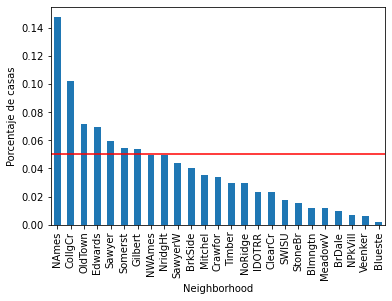

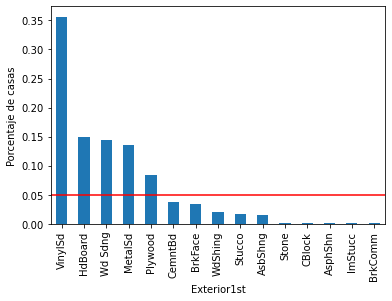

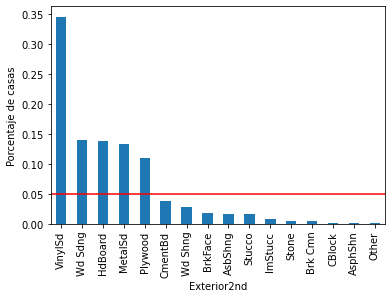

In [7]:
for col in ['Neighborhood', 'Exterior1st', 'Exterior2nd']:

    temp_df = pd.Series(X_train[col].value_counts() / len(X_train) )

    # graficar con los porcentajes
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # anadir linea en 5% para resaltar las categorías raras
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('Porcentaje de casas')
    plt.show()

## Re-agrupando las etiquetas raras con pandas

In [8]:
def categorias_comunes(df, variable, tolerance):
    
    temp = df.groupby([variable])[variable].count() / len(df)
    
    non_rare = [x for x in temp.loc[temp>tolerance].index.values]
    
    return non_rare

In [9]:
# etiquetas comunes
categorias_comunes(X_train, 'Neighborhood', 0.05)

['CollgCr', 'Edwards', 'Gilbert', 'NAmes', 'OldTown', 'Sawyer', 'Somerst']

In [10]:
# etiquetas raras

[x for x in X_train['Neighborhood'].unique() if x not in categorias_comunes(X_train, 'Neighborhood', 0.05)]

['ClearCr',
 'BrkSide',
 'SWISU',
 'Crawfor',
 'Mitchel',
 'Timber',
 'MeadowV',
 'BrDale',
 'NWAmes',
 'NridgHt',
 'SawyerW',
 'NoRidge',
 'IDOTRR',
 'NPkVill',
 'StoneBr',
 'Blmngtn',
 'Veenker',
 'Blueste']

In [11]:
def codificacion_categorias_raras(X_train, X_test, variable, tolerance):

    X_train = X_train.copy()
    X_test = X_test.copy()

    # encontrar la categoría más frecuente
    frequent_cat = categorias_comunes(X_train, variable, tolerance)

    # re-agrupar las categorías raras
    X_train[variable] = np.where(X_train[variable].isin(frequent_cat), X_train[variable], 'Rare')
    
    X_test[variable] = np.where(X_test[variable].isin(frequent_cat), X_test[variable], 'Rare')

    return X_train, X_test

In [12]:
for variable in ['Neighborhood', 'Exterior1st', 'Exterior2nd']:
    
    X_train, X_test = codificacion_categorias_raras(X_train, X_test, variable, 0.05)

In [13]:
def plot_categories(df, cols, ylabel = 'Porcentaje de casas'):
    
    for col in cols:
        temp_df = pd.Series(df[col].value_counts() / len(df))

        # graficar con los porcentajes
        fig = temp_df.sort_values(ascending=False).plot.bar()
        fig.set_xlabel(col)

        # anadir línea a 5% para resaltar categorias poco comunes
        fig.axhline(y=0.05, color='red')
        fig.set_ylabel(ylabel)
        plt.show()

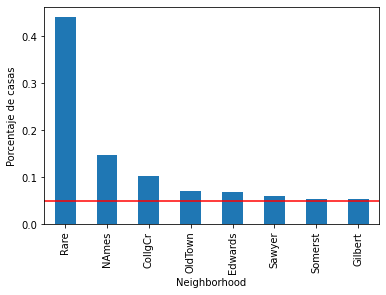

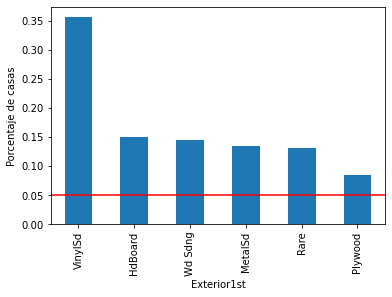

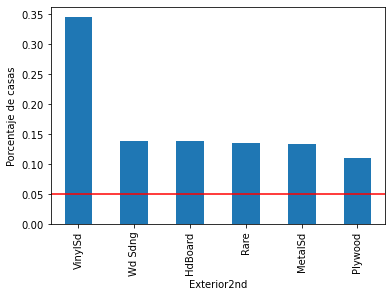

In [14]:
plot_categories(X_train, ['Neighborhood', 'Exterior1st', 'Exterior2nd'])

y ahora codifiquemos las categorías con baja cardinalidad

In [15]:
for variable in ['MasVnrType', 'ExterQual', 'BsmtCond']:
    
    X_train, X_test = codificacion_categorias_raras(X_train, X_test, variable, 0.05)

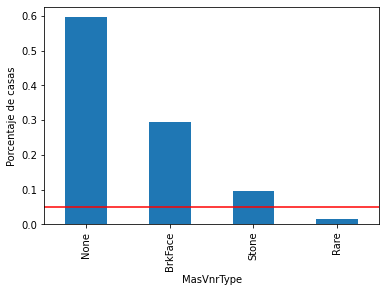

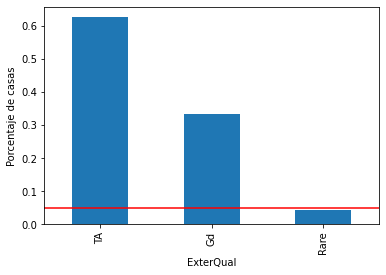

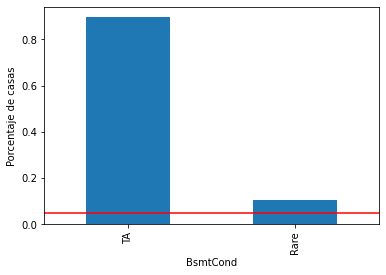

In [16]:
plot_categories(X_train, ['MasVnrType', 'ExterQual', 'BsmtCond'])

## Codificando Etiquetas Raras con Feature-engine

In [17]:
from feature_engine.encoding import RareLabelEncoder as RareLabelCategoricalEncoder

In [18]:
# dividir los datos en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1), # predictores
    data.SalePrice, # target
    test_size=0.3,  # porcentaje de observaciones en el set de prueba
    random_state=0)  # semilla asegurar reproducibilidad

X_train.shape, X_test.shape

((1022, 80), (438, 80))

In [19]:
# Rare value encoder
variables = ['Neighborhood', 'Exterior1st', 'Exterior2nd',
               'MasVnrType', 'ExterQual', 'BsmtCond']

rare_encoder = RareLabelCategoricalEncoder(
    tol=0.05, # mínimo porcentaje para ser considerado no rara ( común)
    n_categories=3, # mínimo número de categorías una variable debe tener  para que se re-agroupe en categorías raras
    variables=variables # variables a re-agrupar
)  

In [20]:
print(X_train[variables].isnull().mean())
print(X_train[variables].isnull().sum())
print(X_train.shape)

Neighborhood    0.000000
Exterior1st     0.000000
Exterior2nd     0.000000
MasVnrType      0.004892
ExterQual       0.000000
BsmtCond        0.023483
dtype: float64
Neighborhood     0
Exterior1st      0
Exterior2nd      0
MasVnrType       5
ExterQual        0
BsmtCond        24
dtype: int64
(1022, 80)


In [21]:
print(X_test[variables].isnull().mean())
print(X_test[variables].isnull().sum())
print(X_test.shape)

Neighborhood    0.000000
Exterior1st     0.000000
Exterior2nd     0.000000
MasVnrType      0.006849
ExterQual       0.000000
BsmtCond        0.029680
dtype: float64
Neighborhood     0
Exterior1st      0
Exterior2nd      0
MasVnrType       3
ExterQual        0
BsmtCond        13
dtype: int64
(438, 80)


In [22]:
X_train.dropna(subset=variables,inplace=True)
X_train.shape

(993, 80)

In [23]:
X_test.dropna(subset=variables,inplace=True)
X_test.shape

(422, 80)

In [24]:
rare_encoder.fit(X_train)

RareLabelEncoder(n_categories=3,
                 variables=['Neighborhood', 'Exterior1st', 'Exterior2nd',
                            'MasVnrType', 'ExterQual', 'BsmtCond'])

In [25]:
rare_encoder.variables

['Neighborhood',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'BsmtCond']

In [26]:
# en el encoder_dict_ encontramos las parejas de etiquetas frecuentes
rare_encoder.encoder_dict_

{'Neighborhood': Index(['NAmes', 'CollgCr', 'OldTown', 'Edwards', 'Sawyer', 'Somerst',
        'Gilbert', 'NWAmes', 'NridgHt'],
       dtype='object'),
 'Exterior1st': Index(['VinylSd', 'HdBoard', 'Wd Sdng', 'MetalSd', 'Plywood'], dtype='object'),
 'Exterior2nd': Index(['VinylSd', 'Wd Sdng', 'HdBoard', 'MetalSd', 'Plywood'], dtype='object'),
 'MasVnrType': Index(['None', 'BrkFace', 'Stone'], dtype='object'),
 'ExterQual': Index(['TA', 'Gd'], dtype='object'),
 'BsmtCond': Index(['TA'], dtype='object')}

In [27]:
X_train = rare_encoder.transform(X_train)
X_test = rare_encoder.transform(X_test)

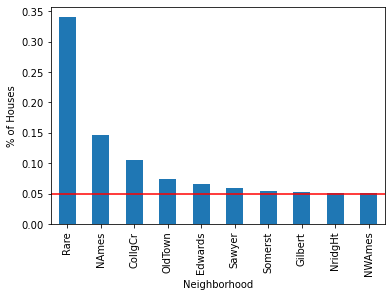

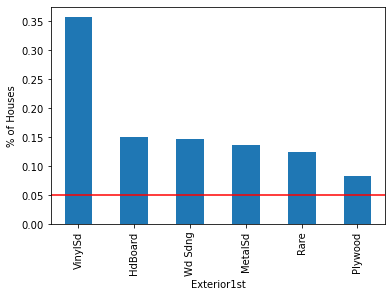

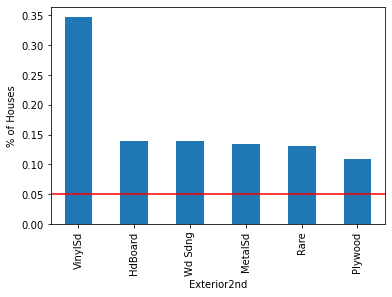

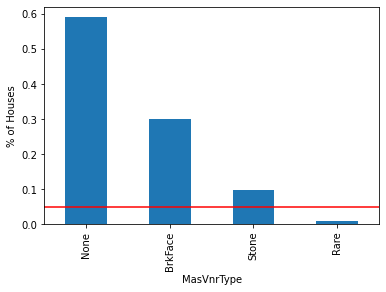

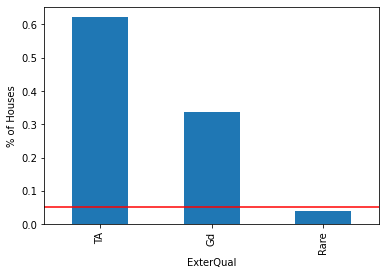

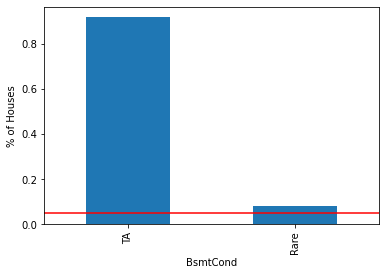

In [28]:
plot_categories(X_train, rare_encoder.variables, '% of Houses')